<a href="https://colab.research.google.com/github/daniel0725q/ai_phishing_udea/blob/main/02%20-%20EntregaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega No. 2

##Bibliotecas y lectura de la base de datos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
data=pd.read_csv('https://raw.githubusercontent.com/daniel0725q/ai_phishing_udea/main/dataset.csv')

data.head()



,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


##Elimación de la columna Index

In [ ]:
del data["index"]

##Las muestras del la base de datos y sus columnas

In [ ]:
data.shape

(11055, 31)

### INFORMACION DE LAS COLUMNAS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

#Resumen estadístico

Utilizando el método de descripción, podemos ver que algunas de las columnas tienen una varianza alta y otras tienen una varianza menor, esto se debe al hecho de que algunas de las columnas tienen valores más grandes y rangos más grandes.

In [ ]:
data.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Balanceo de Result

<Axes: >

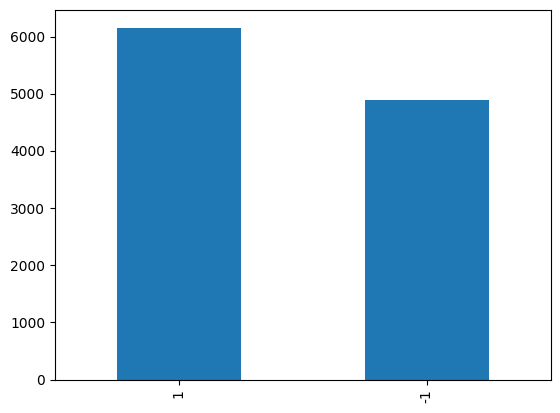

In [ ]:
data['Result'].value_counts().plot(kind='bar')

##Verificacion de datos nulos en las columnas

In [ ]:
data.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

##Imprimir el Result

In [ ]:
print(data['Result'].value_counts())

 1    6157
-1    4898
Name: Result, dtype: int64


##Separación de x & y de Result

> Bloque con sangría



In [ ]:
X = data.drop('Result', axis=1).values
Y = data['Result'].values
print (X.shape , Y.shape)

(11055, 30) (11055,)


##Decision tree

In [ ]:
def experimentar_dt(depths,X, Y):
    """funcion que realiza experimentos de arboles de decision
    depths: list[int] lista con la profundidad de arboles a experimentar
    normalize bool: indica si se aplica normalización a los datos
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - profunidad de los arboles
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for depth in depths:
        EficienciaTrain = []
        EficienciaVal = []
        Macc = []
        Mf1 = []
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]

            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo = DecisionTreeClassifier(max_depth=depth)
            modelo = modelo.fit(Xtrain, Ytrain)
            #predecir muestras de entrenamiento
            Ytrain_pred = modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
            Macc.append(accuracy_score(Ytest, Yest))
            #Mf1.append(f1_score(Ytest, Yest))

        resultados.loc[idx,'profundidad del arbol'] = depth
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy'] = np.mean(Macc)
        #resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1

    return (resultados)

#Resultados del entrenamiento

In [ ]:
resultados_dt = experimentar_dt([3,10,50,100],MinMaxScaler().fit_transform(X), Y)
resultados_dt

,profundidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy
0,3.0,0.908227,0.001163,0.904029,0.011213,0.904029
1,10.0,0.958551,0.001709,0.944367,0.006338,0.944367
2,50.0,0.989889,0.000318,0.962000,0.020044,0.962000
3,100.0,0.989889,0.000318,0.962272,0.019564,0.962272


In [ ]:
remove_n = 3000
drop_indices = np.random.choice(data.index, remove_n, replace=False)
df_subset = data.drop(drop_indices)

X = df_subset.drop('Result', axis=1).values
Y = df_subset['Result'].values
print (X.shape , Y.shape)

(8055, 30) (8055,)


In [ ]:
resultados_dt = experimentar_dt([3,10,20,100],MinMaxScaler().fit_transform(X), Y)
resultados_dt

,profundidad del arbol,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,accuracy
0,3.0,0.911856,0.001276,0.911860,0.011484,0.911860
1,10.0,0.959570,0.001111,0.945746,0.008759,0.945746
2,20.0,0.990661,0.000386,0.960139,0.018340,0.960139
3,100.0,0.991144,0.000342,0.959394,0.018999,0.959394


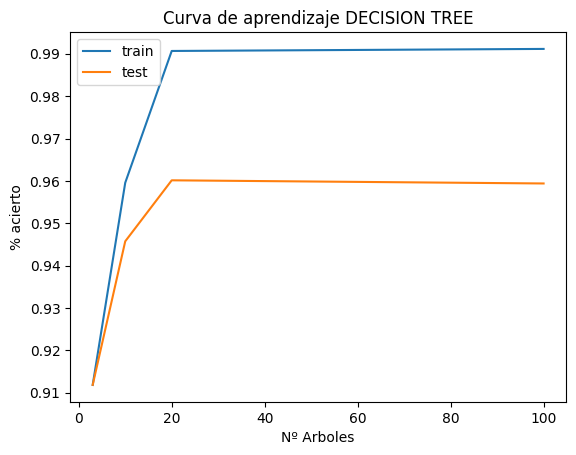

In [ ]:
plt.plot(resultados_dt['profundidad del arbol'], resultados_dt['eficiencia de entrenamiento'], label="train")
plt.plot(resultados_dt['profundidad del arbol'], resultados_dt['eficiencia de prueba'], label="test")
plt.xlabel("Nº Arboles")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje DECISION TREE')
plt.rcParams["figure.figsize"] = (6,6)

#Random forest


In [ ]:
def experimentar_rf(num_trees,numero_de_variables, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            EficienciaTrain = []
            EficienciaVal = []
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, criterion="gini")
                modelo.fit(Xtrain,Ytrain)
                Ytrain_pred = modelo.predict(Xtrain)
                Yest = modelo.predict(Xtest)
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                Macc.append(accuracy_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))



            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            idx= idx +1
        print(f"termina para {trees} arboles")

    return (resultados)

#Resultados del entrenamiento

In [ ]:
arboles = [5,10,20,50,100,150]
variables_seleccion = [5]
resultados_rf = experimentar_rf(arboles, variables_seleccion, X, Y)
resultados_rf

termina para 5 arboles
termina para 10 arboles
termina para 20 arboles
termina para 50 arboles
termina para 100 arboles
termina para 150 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,f1_score
0,5.0,5.0,0.988247,0.000780,0.963495,0.014816,0.963495,0.967202
1,10.0,5.0,0.989999,0.000573,0.968585,0.010391,0.968585,0.971854
2,20.0,5.0,0.990979,0.000366,0.968958,0.012105,0.968958,0.972148
3,50.0,5.0,0.991130,0.000321,0.969082,0.010903,0.969082,0.972308
4,100.0,5.0,0.991144,0.000342,0.969082,0.010674,0.969082,0.972291
5,150.0,5.0,0.991144,0.000342,0.970324,0.010528,0.970324,0.973428


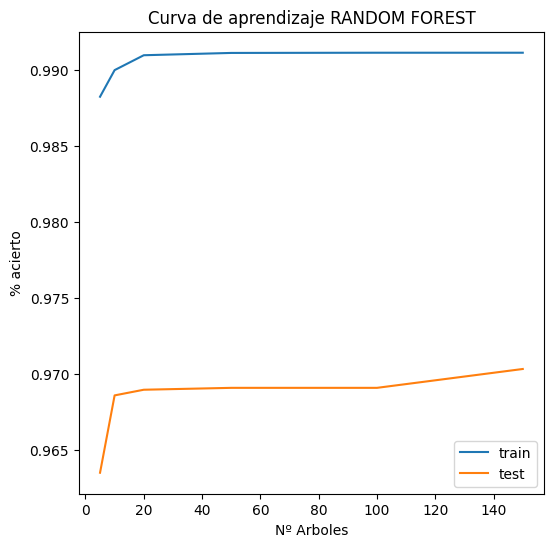

In [ ]:
plt.plot(resultados_rf['número de arboles'], resultados_rf['eficiencia de entrenamiento'], label="train")
plt.plot(resultados_rf['número de arboles'], resultados_rf['eficiencia de prueba'], label="test")
plt.xlabel("Nº Arboles")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje RANDOM FOREST')
plt.rcParams["figure.figsize"] = (6,6)

#Random forest con PCA

In [ ]:
def experimentar_rf_PCA(num_componentes, X, Y):
    folds = 10
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for num_comp in num_componentes:

          EficienciaTrain = []
          EficienciaVal = []
          Mf1 = []
          for train, test in skf.split(X, Y):
              Xtrain = X[train,:]
              Ytrain = Y[train]
              Xtest = X[test,:]
              Ytest = Y[test]

              pca = PCA(n_components=num_comp)
              pca.fit(Xtrain)
              Xtrain = pca.transform(Xtrain)
              Xtest = pca.transform(Xtest)
              modelo = RandomForestClassifier(n_estimators=50, criterion="gini")
              modelo.fit(Xtrain, Ytrain)
              Ytrain_pred = modelo.predict(Xtrain)
              Yest = modelo.predict(Xtest)
              EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
              EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
              Mf1.append(f1_score(Ytest, Yest))

          resultados.loc[idx,'PCA componentes'] = num_comp
          resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
          resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
          resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
          resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
          resultados.loc[idx,'f1_score'] = np.mean(Mf1)
          idx= idx +1

    return (resultados)

#Resultados del entrenamiento

In [ ]:
RFresultadosPCA = experimentar_rf_PCA([1,3,5,10,12,15,17,20,23,25,27,29],X, Y)
RFresultadosPCA

,PCA componentes,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,f1_score
0,1.0,0.988910,0.000773,0.789638,0.100304,0.814001
1,3.0,0.990937,0.000370,0.913696,0.039437,0.922612
2,5.0,0.991075,0.000355,0.938531,0.029262,0.944940
3,10.0,0.991048,0.000420,0.955173,0.019342,0.959681
4,12.0,0.991075,0.000344,0.956290,0.018900,0.960768
5,15.0,0.991089,0.000410,0.958153,0.017643,0.962419
6,17.0,0.991089,0.000381,0.959148,0.015151,0.963365
7,20.0,0.991130,0.000365,0.959148,0.014800,0.963477
8,23.0,0.991130,0.000365,0.960513,0.014509,0.964646
9,25.0,0.991089,0.000333,0.960638,0.014490,0.964776


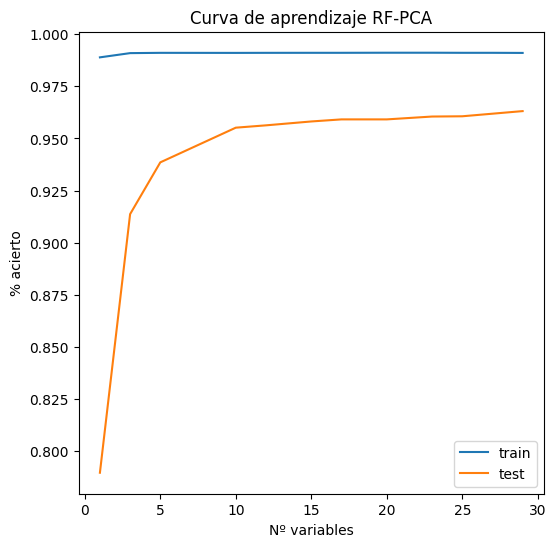

In [ ]:
plt.plot(RFresultadosPCA['PCA componentes'], RFresultadosPCA['eficiencia de entrenamiento'], label="train")
plt.plot(RFresultadosPCA['PCA componentes'], RFresultadosPCA['eficiencia de prueba'], label="test")
plt.xlabel("Nº variables")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje RF-PCA')
plt.rcParams["figure.figsize"] = (6,6)

#Decision tree con PCA

In [ ]:
def experimentar_dt_PCA(num_componentes,depths,X, Y):
    folds = 4
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for num_comp in num_componentes:
      for depth in depths:
          Mf1 = []
          EficienciaTrain = []
          EficienciaVal = []
          for train, test in skf.split(X, Y):
              Xtrain = X[train,:]
              Ytrain = Y[train]
              Xtest = X[test,:]
              Ytest = Y[test]
              pca = PCA(n_components=num_comp)
              pca.fit(Xtrain)
              Xtrain = pca.transform(Xtrain)
              Xtest = pca.transform(Xtest)
              modelo = DecisionTreeClassifier(max_depth=depth)
              modelo = modelo.fit(Xtrain, Ytrain)
              Ytrain_pred = modelo.predict(Xtrain)
              Yest = modelo.predict(Xtest)
              EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
              EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
              Mf1.append(f1_score(Ytest, Yest))

          resultados.loc[idx,'PCA componentes'] = num_comp
          resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
          resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
          resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
          resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
          resultados.loc[idx,'f1_score'] = np.mean(Mf1)
          idx= idx +1

    return (resultados)

#Resultados del entrenamiento

In [ ]:
DTresultadosPCA = experimentar_dt_PCA([1,3,5,10,12,15,17,20,23,25,27,29],[20], X, Y)
DTresultadosPCA

,PCA componentes,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba,f1_score
0,1.0,0.831905,0.022016,0.653244,0.097545,0.711525
1,3.0,0.987461,0.003138,0.839096,0.085986,0.854928
2,5.0,0.991558,0.000702,0.896202,0.061655,0.908862
3,10.0,0.991517,0.000744,0.892229,0.066036,0.904742
4,12.0,0.991103,0.001202,0.894712,0.063872,0.906205
5,15.0,0.991103,0.001149,0.895582,0.065685,0.907267
6,17.0,0.991144,0.000603,0.893596,0.063774,0.905346
7,20.0,0.990523,0.002253,0.894342,0.060014,0.905201
8,23.0,0.990441,0.002392,0.895087,0.060197,0.905327
9,25.0,0.990399,0.002461,0.895459,0.058760,0.905687


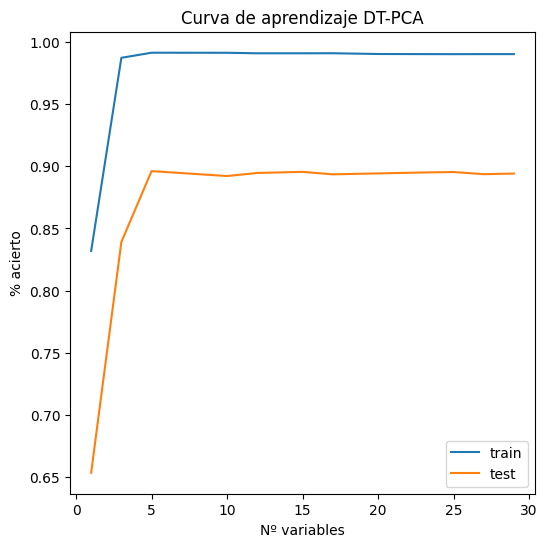

In [ ]:
plt.plot(DTresultadosPCA['PCA componentes'], DTresultadosPCA['eficiencia de entrenamiento'], label="train")
plt.plot(DTresultadosPCA['PCA componentes'], DTresultadosPCA['eficiencia de prueba'], label="test")
plt.xlabel("Nº variables")
plt.ylabel("% acierto")

plt.legend()
plt.title('Curva de aprendizaje DT-PCA')
plt.rcParams["figure.figsize"] = (6,6)